In [60]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../base"))
import classify
import features

In [61]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/features.py'>

In [58]:
categories = pd.read_csv("../../data_q2/q2-ucsd-cat-map.csv")
consumer = pd.read_parquet("../../data_q2/q2-ucsd-consDF.pqt")
acct = pd.read_parquet("../../data_q2/q2-ucsd-acctIDF.pqt")
transactions = pd.read_parquet("../../data_q2/q2-ucsd-trxnDF.pqt")
pd.set_option("display.max_columns", None)

In [59]:
consumer_balance = features.get_balance(acct, consumer, transactions)
transaction_categories = features.get_transaction_categories(transactions, categories)
consumer_features = features.get_category_occurences_sums(transaction_categories, consumer_balance)
all_features = features.one_hot_accounts(acct, consumer_features)
all_features = features.all_cat_percent(all_features, transactions, consumer, categories)
all_features = features.running_total(all_features, transactions)

In [62]:
all_features.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,balance,std_credit,outflow_occurences_ACCOUNT_FEES,outflow_occurences_ATM_CASH,outflow_occurences_AUTOMOTIVE,outflow_occurences_AUTO_LOAN,outflow_occurences_BANKING_CATCH_ALL,outflow_occurences_BILLS_UTILITIES,outflow_occurences_BNPL,outflow_occurences_CHILD_DEPENDENTS,outflow_occurences_CORPORATE_PAYMENTS,outflow_occurences_CREDIT_CARD_PAYMENT,outflow_occurences_DEBT,outflow_occurences_EDUCATION,outflow_occurences_ENTERTAINMENT,outflow_occurences_ESSENTIAL_SERVICES,outflow_occurences_EXTERNAL_TRANSFER,outflow_occurences_FITNESS,outflow_occurences_FOOD_AND_BEVERAGES,outflow_occurences_GAMBLING,outflow_occurences_GENERAL_MERCHANDISE,outflow_occurences_GIFTS_DONATIONS,outflow_occurences_GOVERNMENT_SERVICES,outflow_occurences_GROCERIES,outflow_occurences_HEALTHCARE_MEDICAL,outflow_occurences_HOME_IMPROVEMENT,outflow_occurences_INSURANCE,outflow_occurences_INVESTMENT,outflow_occurences_LEGAL,outflow_occurences_LOAN,outflow_occurences_MISCELLANEOUS,outflow_occurences_MORTGAGE,outflow_occurences_OVERDRAFT,outflow_occurences_PETS,outflow_occurences_RENT,outflow_occurences_RISK_CATCH_ALL,outflow_occurences_RTO_LTO,outflow_occurences_SELF_TRANSFER,outflow_occurences_TAX,outflow_occurences_TRANSPORATION,outflow_occurences_TRAVEL,outflow_sums_ACCOUNT_FEES,outflow_sums_ATM_CASH,outflow_sums_AUTOMOTIVE,outflow_sums_AUTO_LOAN,outflow_sums_BANKING_CATCH_ALL,outflow_sums_BILLS_UTILITIES,outflow_sums_BNPL,outflow_sums_CHILD_DEPENDENTS,outflow_sums_CORPORATE_PAYMENTS,outflow_sums_CREDIT_CARD_PAYMENT,outflow_sums_DEBT,outflow_sums_EDUCATION,outflow_sums_ENTERTAINMENT,outflow_sums_ESSENTIAL_SERVICES,outflow_sums_EXTERNAL_TRANSFER,outflow_sums_FITNESS,outflow_sums_FOOD_AND_BEVERAGES,outflow_sums_GAMBLING,outflow_sums_GENERAL_MERCHANDISE,outflow_sums_GIFTS_DONATIONS,outflow_sums_GOVERNMENT_SERVICES,outflow_sums_GROCERIES,outflow_sums_HEALTHCARE_MEDICAL,outflow_sums_HOME_IMPROVEMENT,outflow_sums_INSURANCE,outflow_sums_INVESTMENT,outflow_sums_LEGAL,outflow_sums_LOAN,outflow_sums_MISCELLANEOUS,outflow_sums_MORTGAGE,outflow_sums_OVERDRAFT,outflow_sums_PETS,outflow_sums_RENT,outflow_sums_RISK_CATCH_ALL,outflow_sums_RTO_LTO,outflow_sums_SELF_TRANSFER,outflow_sums_TAX,outflow_sums_TRANSPORATION,outflow_sums_TRAVEL,inflow_occurrences_CORPORATE_PAYMENTS,inflow_occurrences_DEPOSIT,inflow_occurrences_EXTERNAL_TRANSFER,inflow_occurrences_GAMBLING,inflow_occurrences_INSURANCE,inflow_occurrences_INVESTMENT,inflow_occurrences_INVESTMENT_INCOME,inflow_occurrences_LOAN,inflow_occurrences_MISCELLANEOUS,inflow_occurrences_OTHER_BENEFITS,inflow_occurrences_PAYCHECK,inflow_occurrences_PENSION,inflow_occurrences_REFUND,inflow_occurrences_SELF_TRANSFER,inflow_occurrences_TAX,inflow_occurrences_TIME_OR_STUFF,inflow_occurrences_UNEMPLOYMENT_BENEFITS,inflow_sums_CORPORATE_PAYMENTS,inflow_sums_DEPOSIT,inflow_sums_EXTERNAL_TRANSFER,inflow_sums_GAMBLING,inflow_sums_INSURANCE,inflow_sums_INVESTMENT,inflow_sums_INVESTMENT_INCOME,inflow_sums_LOAN,inflow_sums_MISCELLANEOUS,inflow_sums_OTHER_BENEFITS,inflow_sums_PAYCHECK,inflow_sums_PENSION,inflow_sums_REFUND,inflow_sums_SELF_TRANSFER,inflow_sums_TAX,inflow_sums_TIME_OR_STUFF,inflow_sums_UNEMPLOYMENT_BENEFITS,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,credit_percentage_SELF_TRANSFER,credit_percentage_EXTERNAL_TRANSFER,credit_percentage_DEPOSIT,credit_percentage_PAYCHECK,credit_percentage_MISCELLANEOUS,credit_percentage_REFUND,credit_percentage_INVESTMENT_INCOME,credit_percentage_OTHER_BENEFITS,credit_perc


Logistic Regression Results
ROC-AUC: 0.792 | Accuracy: 0.755
Training Time: 1.8s
              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85      1785
         1.0       0.19      0.68      0.30       151

    accuracy                           0.76      1936
   macro avg       0.58      0.72      0.58      1936
weighted avg       0.91      0.76      0.81      1936


Random Forest Results
ROC-AUC: 0.795 | Accuracy: 0.895
Training Time: 12.1s
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      1785
         1.0       0.30      0.26      0.28       151

    accuracy                           0.90      1936
   macro avg       0.62      0.60      0.61      1936
weighted avg       0.89      0.90      0.89      1936

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Info] Number of positive: 6833, number of negative: 6833
[L

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:31:56] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results
ROC-AUC: 0.796 | Accuracy: 0.913
Training Time: 2.0s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      1785
         1.0       0.39      0.21      0.27       151

    accuracy                           0.91      1936
   macro avg       0.66      0.59      0.61      1936
weighted avg       0.89      0.91      0.90      1936


CatBoost Results
ROC-AUC: 0.799 | Accuracy: 0.917
Training Time: 22.6s
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1785
         1.0       0.44      0.23      0.30       151

    accuracy                           0.92      1936
   macro avg       0.69      0.60      0.63      1936
weighted avg       0.90      0.92      0.90      1936


HistGB Results
ROC-AUC: 0.795 | Accuracy: 0.914
Training Time: 3.3s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      1785
         1.0       0.42   

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Top Features (RandomForestClassifier):
                        Feature  Importance  Correlation
                     std_credit    0.039112    -0.276897
           account_type_SAVINGS    0.035498    -0.111295
      outflow_sums_ACCOUNT_FEES    0.021826     0.009304
         outflow_sums_OVERDRAFT    0.020819     0.025477
   trxn_percentage_ACCOUNT_FEES    0.019774     0.026247
  debit_percentage_ACCOUNT_FEES    0.019368     0.021062
                        balance    0.018966    -0.038656
   outflow_occurences_OVERDRAFT    0.017441     0.076062
outflow_occurences_ACCOUNT_FEES    0.016954     0.023379
                         1M_var    0.015440    -0.010000

Top Features (BalancedRandomForestClassifier):
                        Feature  Importance  Correlation
           account_type_SAVINGS    0.042918    -0.111295
                     std_credit    0.042259    -0.276897
                        balance    0.025469    -0.038656
outflow_occurences_ACCOUNT_FEES    0.021863     0.023379


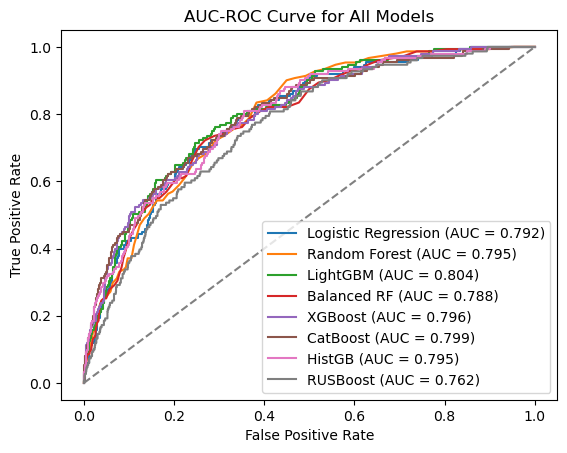

In [63]:
classification_features = all_features.columns[4:]
classify.run_classification(classification_features, "DQ_TARGET", all_features)

In [64]:
best_features = classify.get_best_features(classification_features, "DQ_TARGET", all_features)

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Logistic Regression Results
ROC-AUC: 0.787 | Accuracy: 0.723
Training Time: 0.3s
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83      1785
         1.0       0.17      0.68      0.28       151

    accuracy                           0.72      1936
   macro avg       0.57      0.70      0.55      1936
weighted avg       0.90      0.72      0.79      1936


Random Forest Results
ROC-AUC: 0.786 | Accuracy: 0.880
Training Time: 8.2s
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1785
         1.0       0.29      0.36      0.32       151

    accuracy                           0.88      1936
   macro avg       0.62      0.64      0.63      1936
weighted avg       0.89      0.88      0.89      1936

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Info] Number of positive: 6814, number of negative: 6814
[Li

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:34:38] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results
ROC-AUC: 0.779 | Accuracy: 0.902
Training Time: 0.7s
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1785
         1.0       0.31      0.21      0.25       151

    accuracy                           0.90      1936
   macro avg       0.62      0.58      0.60      1936
weighted avg       0.89      0.90      0.89      1936


CatBoost Results
ROC-AUC: 0.777 | Accuracy: 0.903
Training Time: 9.0s
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1785
         1.0       0.34      0.25      0.29       151

    accuracy                           0.90      1936
   macro avg       0.64      0.61      0.62      1936
weighted avg       0.89      0.90      0.90      1936


HistGB Results
ROC-AUC: 0.779 | Accuracy: 0.899
Training Time: 1.6s
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1785
         1.0       0.31    

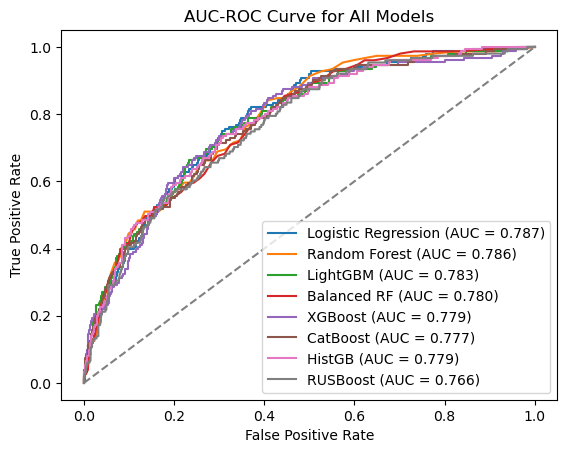

In [65]:
classify.run_classification(best_features[0], "DQ_TARGET", all_features)


Logistic Regression Results
ROC-AUC: 0.777 | Accuracy: 0.731
Training Time: 0.2s
              precision    recall  f1-score   support

         0.0       0.96      0.74      0.83      1785
         1.0       0.18      0.66      0.28       151

    accuracy                           0.73      1936
   macro avg       0.57      0.70      0.56      1936
weighted avg       0.90      0.73      0.79      1936


Random Forest Results
ROC-AUC: 0.790 | Accuracy: 0.894
Training Time: 5.0s
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      1785
         1.0       0.31      0.28      0.30       151

    accuracy                           0.89      1936
   macro avg       0.62      0.62      0.62      1936
weighted avg       0.89      0.89      0.89      1936

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Info] Number of positive: 6479, number of negative: 6479
[Li

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:36:10] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results
ROC-AUC: 0.786 | Accuracy: 0.908
Training Time: 0.4s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      1785
         1.0       0.36      0.23      0.28       151

    accuracy                           0.91      1936
   macro avg       0.65      0.60      0.61      1936
weighted avg       0.89      0.91      0.90      1936


CatBoost Results
ROC-AUC: 0.798 | Accuracy: 0.917
Training Time: 7.6s
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1785
         1.0       0.43      0.22      0.29       151

    accuracy                           0.92      1936
   macro avg       0.69      0.60      0.62      1936
weighted avg       0.90      0.92      0.90      1936


HistGB Results
ROC-AUC: 0.788 | Accuracy: 0.904
Training Time: 2.3s
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1785
         1.0       0.32    

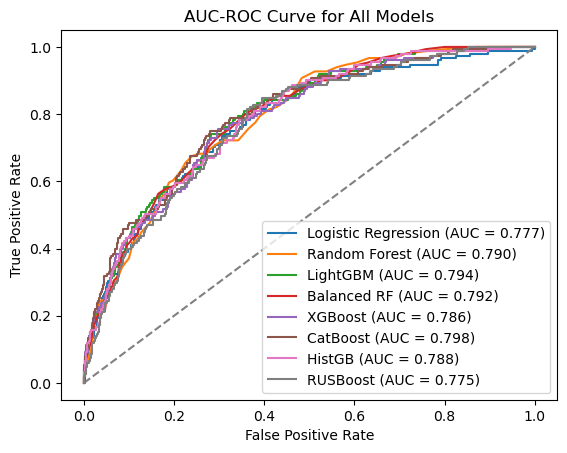

In [66]:
classify.run_classification(best_features[2], "DQ_TARGET", all_features)
